# Tutorial: Cat Qubit Circuit QED

In this tutorial you will learn:
- how to physically engineer a cat qubit using superconducting circuits
- the circuit Hamiltonian of Alice & Bob's chip architecture
- how to obtain the approximate model of the Hamiltonian presented in the previous tutorial.

To physically engineer a cat qubit that is dissipatively stabiliced, we need the following ingredients: A high-quality bosonic mode that will host the cat qubit, called memory mode, a lossy bosonic mode, called buffer mode, and a non-linear element. This nonlinear element is there to mediate a specific interaction that allows to exchange two photons of mode **a** (memory) with one of mode **b** (buffer). In mode a, we aim to stabilize a cat qubit, whereas mode b is highly lossy such that excitations are immediately lost to the environment.

At Alice & Bob, as a non-linear element to engineer this interaction called **asymmetrically-threaded SQUID**, ATS for short.

Let's explore how this element works in detail.

For superconducting quantum circuits, see [this dedicated tutorial](Tutorial_SuperconductingCircuits.ipynb). 

## The ATS

The ATS consists of two superconducting Josephson junctions and one linear inductor (that is itself made from multiple Josephson junctions). These elements are arranged in a way to form two loops, with Josephson junctions at each side, and a linear inductor in the middle.

Schematically, this looks like this:

![](media/ATS_schematic.png "Schematic of a cat qubit circuit using an ATS")

On an actual device, it looks something like this (zoom on the ATS on the top right):

![](media/TIGRO.png "Circuit design in Réglade, Bocquet et al. It only consists of a superconducting lambda/4 resonator hosting the Cat Qubit mode (blue) coupled to a lossy buffer mode (red). Pairs of photons of the memory are converted to buffer photons by pumping the ATS (white) through two flux lines (yellow).")

As you can see, the Josephson junctions are particularly tiny and fragile structures.

### Potential of the ATS

Similar as described in [this tutorial](Tutorial_SuperconductingCircuits.ipynb), the potential of the ATS can be written as:

$$U(\varphi) = \frac{1}{2} E_{L} \varphi^2 - E_{J,l} \cos(\varphi + \varphi_{\mathrm{ext}, l}) - E_{J,r} \cos(\varphi - \varphi_{\mathrm{ext}, r})$$

Here, $E_L$ describes the inductive energy of the ATS, and $E_{J,l}$ and $E_{J,r}$ are the Josephson energies of the left and right Josephson junctions, respectively.
$ \varphi_{\mathrm{ext}, l}$ and $\varphi_{\mathrm{ext}, l}$ are external fluxes that can be tuned by external flux lines that change the magnetic field inside the loops.

Ideally, we want the left and right Josephson junctions to be as symmetric as possible, but due to fabrication imperfections there is always a small remaining asymmetry.
We can rewrite the ATS potential in terms of this difference: Writing $E_{J, l} = E_J + \Delta E_J$, and $E_{J, r} = E_J - \Delta E_J$, we can have

$$U(\varphi) =  \frac{1}{2} E_{L} \varphi^2 - 2 E_J \cos(\varphi_\Sigma) \cos(\varphi + \varphi_\Delta) + 2 \Delta E_J \sin(\varphi_\Sigma)\sin(\varphi_\Sigma + \varphi_\Delta)$$

Here, we have introduced the common flux $\varphi_\Sigma = ( \varphi_{\mathrm{ext}, l} +  \varphi_{\mathrm{ext}, r})/2$ and the differential flux $\varphi_\Delta = ( \varphi_{\mathrm{ext}, l} -  \varphi_{\mathrm{ext}, r})/2$. This allows us to better see what is going on. 

## Circuit Hamiltonian

When quantizing the system, the flux variable $\varphi$ becomes quantized and can be written as:
$$\varphi \rightarrow \hat{\varphi} = \varphi_a (\hat{a} + \hat{a}^\dagger) +  \varphi_b (\hat{b} + \hat{b}^\dagger)$$
The phase operator $\hat{\varphi}$ directly depends on the buffer and memory mode operators, where zero-point-fluctuations $\varphi_a$ and $\varphi_b$ tell us about the participation of each mode in the ATS (a large $\varphi_a$ means that mode a participates a lot in the ATS potential).

We can now write the circuit Hamiltonian of our system.

$$\begin{align*}\hat{H} &= \omega_{a,0} \hat{a}^\dagger \hat{a} + \omega_{b,0} \hat{b}^\dagger \hat{b}\\
&-2 E_J \cos(\varphi_\Sigma) \cos(\hat{\varphi}+ \varphi_\Delta)\\
&+2 \Delta E_J \sin(\varphi_\Sigma) \sin(\hat{\varphi}+ \varphi_\Delta)
\end{align*}$$

Here, $\omega_{a,0}$ and $\omega_{b,0}$ are the bare frequencies of mode a and mode b, respectively.

## Engineering a parametric two-photon interaction

As a reminder of our findal goal: We would like to engineer a process that exchanges two photons of the memory with one photon in the buffer, i.e. a term of the form $g_2^*\hat{a}^2 \hat{b}^\dagger + g_2 {{}\hat{a}^\dagger}^2\hat{b}$.

This target interaction is a third-order process in terms of operators involved. To activate this process, and make it strong at the same time, we bias the ATS with a constant external flux and by driving on top of this.

By choosing 

$$\begin{align*}
\varphi_\Sigma &= \pi/2 + \epsilon(t)\\
\varphi_\Delta &= \pi/2
\end{align*}$$

Then, our Hamiltonian becomes:

$$\begin{align*}\hat{H} &= \omega_{a,0} \hat{a}^\dagger \hat{a} + \omega_{b,0} \hat{b}^\dagger \hat{b}\\
&-2 E_J \sin(\epsilon(t)) \sin(\hat{\varphi})\\
&+2 \Delta E_J \cos(\epsilon(t)) \cos(\hat{\varphi})
\end{align*}$$

It becomes now more clear that the two-photon exchange interaction will come from the term proportional to $-2E_J$.
We chose a flux pump of the form $\epsilon(t) = \epsilon_p \cos(\omega_p t)$,
We can now Taylor expand the term proportional to $-2E_J$ up to third order:

$$-2 E_J \sin(\epsilon(t)) \sin(\hat{\varphi}) \approx -2 E_J \epsilon(t)\varphi_a (\hat{a} + \hat{a}^\dagger)  -2 E_J \epsilon(t)\varphi_b (\hat{b} + \hat{b}^\dagger) 
+ \frac{1}{3} E_J \epsilon(t) \left(\varphi_a (\hat{a} + \hat{a}^\dagger) +  \varphi_b (\hat{b} + \hat{b}^\dagger)\right)^3$$ 



The first two terms are drives of the modes a and b with driving frequency $\omega_p$. The third-order term contains our target interaction term.

## The displaced-rotating frame

We would like to go into a reference frame where the two-photon interaction term is time-independent.
A nice thing in quantum mechanics is that we can always apply a unitary transformation to our Hamiltonian without chaning the physics.
And hence, we can choose a unitary transformation that can drastically simplify our system Hamiltonian.

## The rotating frame

Let's give a  simple example for a rotating frame.

Consider a bosonic mode with eigenfrequency $\omega_a$ that is driven with a frequency $\omega_d$ and that is subject to single-photon loss.

The evolution of this system is given by the master equation:
$$\frac{d\hat{\rho}}{d t} = -i [\hat{H}, \hat{\rho}] + \kappa_a \mathcal{D}[\hat{a}] (\hat{\rho})$$
The Hamiltonian of the system is simply given by:
$$H = \omega_a \hat{a}^\dagger \hat{a} + \epsilon_d^* e^{i\omega_d t} \hat{a} + \epsilon_d e^{-i\omega_d t} \hat{a}^\dagger$$

We see that the system above is explicitly time-dependent.

However, we can perform a unitary transformation $\hat{\rho} \rightarrow \tilde{\rho} = \hat{U}(\varphi)\hat{\rho}\hat{U}^\dagger (\varphi)$ to remove this explicit time-dependence. Here, the operators $\hat{a}$ and $\hat{a}^\dagger$ are modulated with $e^{\pm i\omega_d t}$. But if we choose a rotation as our unitary transformation, 
$$U(\varphi) = e^{-i\varphi \hat{a}^\dagger \hat{a}},$$
our operators transforms as $\hat{a} \rightarrow \tilde{a} = \hat{U}(\varphi)\hat{a}\hat{U}^\dagger (\varphi) = \hat{a}e^{-i\varphi}$, and $\hat{a}^\dagger \rightarrow \hat{a}^\dagger e^{i \varphi}$.

From the definition of the dissipator, we can check that it remains unchanged under this particular transformation (See tutorial on open quantum systems).

Hence, if we choose a rotating frame with $\varphi = \omega_d t$, we can exactly remove the time-dependence from the drive.

However, we have to be careful about one thing: Since the unitary is explicitly time-dependent, we have to apply the chain rule to $ \tilde{\rho}$ to get the correct dynamics in this frame.

As a result, we obtain an additional term in our Hamiltonian (convince yourself of this, by calculating this explicilty):

$$\frac{d\tilde{\rho}}{d t} = -i [\tilde{H} -i \left(\frac{\partial\hat{U}(t)}{\partial t}\right) \hat{U}^\dagger, \tilde{\rho}] + \kappa_a \mathcal{D}[\hat{a}] (\tilde{\rho})$$

For the rotation operator $U(\varphi) = e^{-i\varphi \hat{a}^\dagger \hat{a}}$, we simply have $-i \dot{\hat{U}} \hat{U}^\dagger = -\omega_d \hat{a}^\dagger \hat{a}$.

Now, we are left with a much simpler system:

$$\tilde{H} = \Delta \hat{a}^\dagger \hat{a} + \epsilon_d^* \hat{a} + \epsilon_d \hat{a}^\dagger.$$
Here $\Delta = \omega_a - \omega_d$ simply denotes the detuning between the eigenfrequency of the system and the frequency of the drive.

### The displaced frame

There is another cool and useful change of reference frame called the *displaced frame*. This frame allows us to go into a frame in which a linear drive (like the one we considered above, $\hat{H}_d =  \epsilon_d^* e^{i\omega_d t} \hat{a} + \epsilon e^{-i\omega_d t} \hat{a}^\dagger$) is removed entirely.

Let's look at an example:

Consider the dissipative dynamics from the previous section.

We can straightforwardly compute the dynamics of $\hat{a}$ in the steady-state:

$$\frac{\mathrm{d}\hat{a}}{\mathrm{d}t} = \mathcal{L}^\dagger \hat{a}$$
Here, $\mathcal{L}^\dagger$ is the adjoint Lindblad master equation.
For the considered system, we have:

$$\frac{\mathrm{d}\hat{a}}{\mathrm{d}t} = - \left(i\omega_a + \frac{\kappa_a}{2}\right) \hat{a} - i \epsilon_d e^{-i\omega_d t}$$

Taking the expactation value $\alpha(t) = \langle\hat{a}(t)\rangle$ we have in the long-time limit $t\gg1/\kappa_a$:
$$ \alpha(t) = \frac{-i \epsilon_d e^{-i\omega_d t}}{\frac{\kappa_a}{2} + i (\omega_a-\omega_d)}$$


We hence know how the dynamics of the expectation value $\langle\hat{a}\rangle$ behaves in the long-time limit.

We can therefore move into a displaced frame with displacement operator:
$$\hat{D}(\alpha(t)) = \exp(\alpha^*(t)\hat{a} - \alpha(t)\hat{a}^\dagger)$$
As a results, operators transform as $\tilde{a}  = \hat{D}^\dagger(\alpha(t)) \hat{a} \hat{D} (\alpha(t)) = \hat{a} + \alpha(t)$

Overall, the Hamiltonian transforms as: 
$$\begin{align*}
    H(\hat{a}, \hat{a}^\dagger ) &\rightarrow \hat{H}_D(\hat{a}
, \alpha_t, \hat{a}^\dagger, \alpha_t^*) = \hat{U}(t)H(\hat{a}, \hat{a}^\dagger )\hat{U}^\dagger(t) - i \left(\frac{\partial\hat{U}(t)}{\partial t}\right) \hat{U}^\dagger(t)\\
&= \hat{H}(\hat{a} + \alpha_t, \hat{a}^\dagger + \alpha_t^*) + i (\dot{\alpha}_t^* \hat{a} - 
\dot{\alpha}_t \hat{a}^\dagger).
\end{align*}$$

We can check if this actually removes the drive term numerically:

In [1]:
import dynamiqs as dq
import jax.numpy as jnp

In [2]:
omega_a = 1.0 # eigenfrequency of the mode
epsilon_d = 2.0 # drive strength
omega_d = 1.0 # resonant drive
kappa_a = 1.2 # single-photon loss rate

na = 20 # Hilbert space size

a = dq.destroy(na) # annihilation operator
adag = a.dag() # creation operator

psi0 = dq.coherent(na, 0.0) # start in the vaccum

H_d = dq.modulated(lambda t: epsilon_d*jnp.exp(1j*omega_d*t), adag) + dq.hc
H_0 = omega_a * adag @ a
H = H_0 + H_d

tsave = jnp.linspace(0, 20, 400)

res = dq.mesolve(H, [jnp.sqrt(kappa_a)*a], psi0, tsave)

|██████████| 100.0% ◆ elapsed 56.42ms ◆ remaining 0.00ms
100%|██████████| 120/120 [00:05<00:00, 21.24it/s]


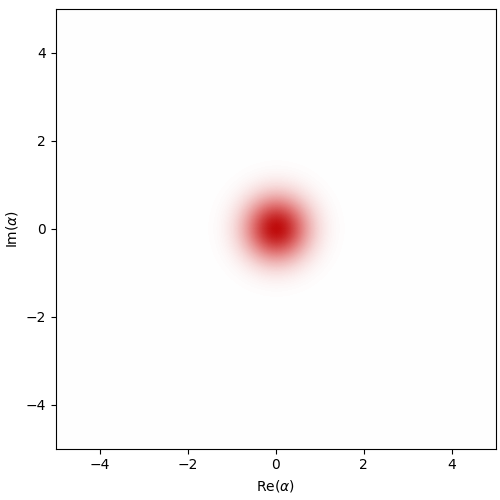

In [3]:
dq.plot.wigner_gif(res.states, fps = 24)

Let's compute the new frame:

In [4]:
def alpha(t):
    num = -1j*epsilon_d*jnp.exp(1j*omega_d*t)
    denom = kappa_a/2 + 1j*(omega_a-omega_d)
    return num/denom

def dalpha(t):
    return 1j*omega_d*alpha(t)

In [5]:
I = dq.eye(na)
H_d = dq.timecallable(lambda t: epsilon_d*jnp.exp(1j*omega_d*t) * (adag + jnp.conj(alpha(t))*I)
                      + jnp.conj(epsilon_d)*jnp.exp(-1j*omega_d*t) * (a + alpha(t)*I))
H_0 = omega_a * dq.timecallable(lambda t: (adag + jnp.conj(alpha(t))*I) @ (a + alpha(t)*I))
H_nu = dq.timecallable(lambda t: (1j*jnp.conj(dalpha(t))*a - 1j*dalpha(t)*adag))

lop = dq.timecallable(lambda t: jnp.sqrt(kappa_a)*(a + alpha(t)*I))

psi0 = dq.todm(dq.coherent(na, 0.0))

tsave = jnp.linspace(0, 50, 400)


In [6]:
res_displaced = dq.mesolve(H, [lop], psi0, tsave)

|          |   0.0% ◆ elapsed 0.84ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 33.52ms ◆ remaining 0.00ms
100%|██████████| 120/120 [00:05<00:00, 22.45it/s]


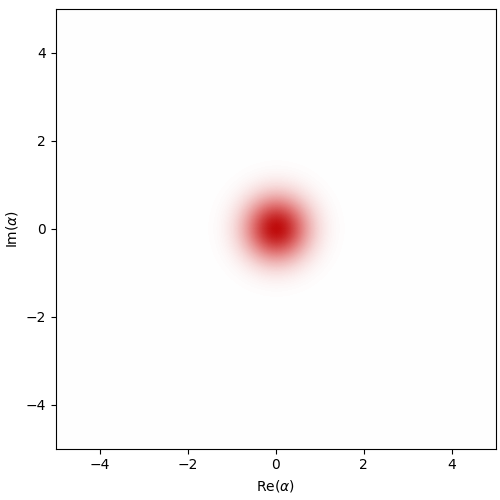

In [7]:
dq.plot.wigner_gif(res_displaced.states, fps = 24)

We now see that we have completely removed all dynamics from the system caused by a linear drive.
This is extremely helpful, if we have dynamics that has non-linear processes as well as a linear drive.
By going into a displaced frame, we can then remove the linear drive and better see the effect of the non-linear processes.

The displaced frame and rotating frame can also be combined into a a single rotated-displaced frame.
Here it's important in which order you do the two transformations. Otherwise, the joint rotated-displaced transformation is straight-forward and just like as explained above.

## Cat qubit physics in the rotated-displaced frame

Now, we can look at the Hamiltonian in the rotated-displaced frame.

Here, the displacement amplitudes $\xi_{a/b}$ (analogous to $\alpha(t)$ from the previous section) of the modes a and b are given by:

$$\xi_{a/b}(t) \approx \xi_{a/b}e^{-i\omega_p t} =  e\frac{-i E_J \epsilon_p \varphi_{a/b} e^{-i\omega_p t}}{\kappa_{a/b}/2 + i (\omega_{a/b, 0} - \omega_p)}$$

(In fact, there is also a counter-rotating contribution, rotating with $e^{i\omega_p t}$, can you find out how this term looks like?)

In the displaced frame, the Hamiltonian reads (up to third order term):

$$\begin{align*}
H \approx& \omega_{a,0} \hat{a}^\dagger \hat{a} + \omega_{b, 0} \hat{b}^\dagger \hat{b}\\
&+\frac{1}{3}E_J \epsilon(t) \left(\varphi_a(\hat{a} + \hat{a}^\dagger + \xi_a(t) + \xi_a^* (t)) +  \varphi_b(\hat{b} + \hat{b}^\dagger + \xi_b(t) + \xi_b^* (t))  \right)^3
\end{align*}$$


In practice, the buffer b is driven resonantly to its eigenfrequency, such that the drive frequency is $\omega_d = \omega_b$.
The frequency of the ATS pump is tuned to match the condition $\omega_p = 2\omega_a - \omega_d$. This enables exactly the two-photon exchange that we want.

In the rotating frame where we rotate mode a at $(\omega_p + \omega_d)/2$ and mode b at $\omega_d$, we have:

$$\begin{align*}
H_\mathrm{rot} =& \left(\omega_{a,0} - \frac{\omega_p + \omega_d}{2}\right) \hat{a}^\dagger \hat{a} + (\omega_{b, 0} - \omega_d) \hat{b}^\dagger \hat{b}\\
&+\frac{1}{3}E_J \epsilon(t) \left(\varphi_a(\hat{a}e^{- i\frac{\omega_p + \omega_d}{2}t} + \hat{a}^\dagger e^{i\frac{\omega_p + \omega_d}{2}t} + \xi_a(t) + \xi_a^* (t)) +  \varphi_b(\hat{b}e^{-i\omega_d t} + \hat{b}^\dagger e^{i\omega_d t} + \xi_b(t) + \xi_b^* (t))  \right)^3
\end{align*}$$

We can now drop all fast-oscillatin terms (this is called the **Rotating-Wave-Approximation** (RWA)), as these terms will aproximately average out to zero.

As a result, we finally have:

$$H_\mathrm{RWA} = \left(\omega_a - \frac{\omega_p + \omega_d}{2}\right) \hat{a}^\dagger \hat{a} + (\omega_b - \omega_d) \hat{b}^\dagger \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger + g_2 {{}\hat{a}^\dagger}^2 \hat{b}$$

The strenght of the two-photon exchange is given by $g_2 = E_J \epsilon_p \varphi_a^2 \varphi_b$.


Here, the true frequencies of the modes $\omega_a$ and $\omega_b$ obtain a shift from the ATS drive (this is called AC-Stark shift): $\omega_{a/b} = \omega_{a/b,0} - \Delta_{a/b}$, with
$$\Delta_{a/b} = \frac{1}{3}E_J\varphi_{a/b}^2(\mathrm{Re}(\xi_a)\varphi_a + \mathrm{Re}(\xi_b)\varphi_b)$$

For the frequency matching conditions $\omega_d = \omega_b$, and $\omega_p = 2\omega_a - \omega_d$, we have only the two-photon exchange Hamiltonian:

$$\hat{H}_{\mathrm{2ph}} = g_2^* \hat{a}^2 \hat{b}^\dagger + g_2 {{}\hat{a}^\dagger}^2 \hat{b}$$

For more information, feel free to read this paper:

[Lescanne et al. Exponential suppression of bit-flips in a qubit encoded in an oscillator. Nature Physics (2020)](https://arxiv.org/abs/1907.11729)

Now you know all the knitty-gritty details of how to obtain a two-photon exchange interaction by parametrically flux-puming an ATS.

Of course, there are always important details and this tutorial is far away from being a complete review. But this should give you a first intuition of what is going on here.